## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [24]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [25]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [34]:
(df.query('converted == "1"')['converted'].count()/df['converted'].count())*100

11.965919355605511

e. The number of times the `new_page` and `treatment` don't line up.

In [21]:
mism = df.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')")
mism.shape[0]

3893

f. Do any of the rows have missing values?

In [43]:
sum(df.duplicated())

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [4]:
df2 = pd.read_csv('ab_data.csv')


In [5]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

3893

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [7]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [53]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

22        767017
192       656468
226       773693
240       733976
246       704650
269       670052
276       784557
303       753749
308       857184
327       686623
357       856078
478       867227
490       808613
654       823319
655       726766
685       666385
703       859503
713       748761
753       646066
774       864223
776       820951
846       637639
850       793580
889       839954
981       727266
988       698120
1037      880442
1106      817911
1165      844879
1177      651511
           ...  
293443    738761
293449    715367
293480    638376
293530    934040
293544    817753
293548    797335
293568    704024
293604    648354
293628    700036
293657    914482
293659    691336
293662    927109
293706    795519
293712    811222
293773    688144
293817    876037
293888    865405
293894    741581
293917    738357
293980    916033
293996    942612
294014    813406
294200    928506
294252    892498
294253    886135
294308    905197
294309    787083
294328    6415

c. What is the row information for the repeat **user_id**? 

In [9]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2 = df2.drop(df2[(df2.user_id == 773192)& (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)
df2[df2['user_id'] == 773192]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [20]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [21]:
df2.shape

(294477, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [34]:
df2.query('converted==1')['user_id'].count()/df2['converted'].count()

0.11965919355605512

In [35]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Given that an individual was in the `control` group, what is the probability they converted?

In [6]:
df2.query('converted == 1 and group == "control"')['user_id'].nunique()/df2.query('group == "control"')['user_id'].nunique()


0.12109853278155888

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [51]:
df2.query('converted == 1 and group == "treatment"')['user_id'].nunique()/df2.query('group == "treatment"')['user_id'].nunique()

0.11957562002679718

d. What is the probability that an individual received the new page?

In [24]:
df2.query('landing_page == "new_page"')['user_id'].nunique()/df2['user_id'].shape[0]

0.49686903605702293

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Your answer goes here.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer :**

NULL HYPOTHESES      :  $H_{0}$  : $p_{new}$ > $p_{old}$

ALTERNATIVE HYPOTHESES : $H_{1}$ : $p_{old}$ <  $p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [8]:
pnew = df2['converted'].mean()
pnew

0.11965919355605512

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [9]:
pold = df2['converted'].mean()
pold

0.11965919355605512

c. What is $n_{new}$?

In [10]:
nnew = df2[df2['group'] == 'treatment'].shape[0]
nnew

147276

d. What is $n_{old}$?

In [11]:
nold = df2[df2['group'] == 'control'].shape[0]
nold

147202

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [12]:
new_page_converted = np.random.binomial(nnew, pnew)
new_page_converted

17687

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [13]:
old_page_converted = np.random.binomial(nold, pold)
old_page_converted

17586

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [14]:
new_page_converted/nnew - old_page_converted/nold

0.0006257593367167275

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [16]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(nnew, pnew)
    old_page_converted = np.random.binomial(nold, pold)
    dif = new_page_converted/nnew - old_page_converted/nold
    p_diffs.append(dif)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    9.,    54.,   331.,  1299.,  2460.,  2929.,  1949.,   768.,
          183.,    18.]),
 array([-0.00476679, -0.00386348, -0.00296017, -0.00205686, -0.00115355,
        -0.00025024,  0.00065307,  0.00155638,  0.00245969,  0.00336299,
         0.0042663 ]),
 <a list of 10 Patch objects>)

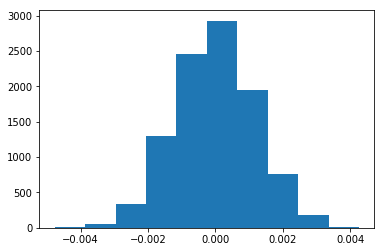

In [17]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [25]:
a_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
print(a_diff)

-0.00147959979408


In [28]:
p_diffs = np.array(p_diffs)
(a_diff < p_diffs).mean()

0.89239999999999997

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer :**
Here we are finding P-Value, which is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true. In simple words, if the P-Value is large, it means the evidence is weak against the null hypothesis.

In our case, we can see that the results haven't changed with the new page. The older page performed slightly better. Hence, the null hypothesis is true.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [18]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group== 'control'"))
n_new = len(df2.query("group == 'treatment'"))
convert_old

17723

In [43]:
convert_new

17514

In [44]:
n_old

147202

In [37]:
n_new

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
10,929503,2017-01-18 05:37:11.527370,treatment,new_page,0
11,834487,2017-01-21 22:37:47.774891,treatment,new_page,0
12,803683,2017-01-09 06:05:16.222706,treatment,new_page,0
13,944475,2017-01-22 01:31:09.573836,treatment,new_page,0
14,718956,2017-01-22 11:45:11.327945,treatment,new_page,0


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [20]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative ='smaller')
print(z_score, p_value)

1.23692175473 0.891941933651


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer :**


In [21]:
from scipy.stats import norm

print(norm.cdf(z_score))
print(norm.ppf(1-(0.05)))

0.891941933651
1.64485362695


Z-Score : 1.23692175473

P-Score : 0.891941933651

Critical Value Score : 1.64485362695

From the above we can see that the critical value score is "1.64485362695". Which is greater than the Z-Score i.e "1.23692175473". And we know that the old page conversions are slightly better than the old page, I tottally agree with the findings.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer : Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [58]:
df2['intercept']=1
df2[['control','treatment']] = pd.get_dummies(df2['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [59]:
import statsmodels.api as sm
logit = sm.Logit(df2['converted'],df2[['intercept' ,'treatment']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Oct 2018   Pseudo R-squ.:               7.093e-06
Time:                        17:48:24   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
treatment     -0.0140      0.011     -1.237      0.216      -0.036       0.008
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer : 0.216**

Reason :For alternative hypotheses $H_{1}$ : $p_{new}$ not equal to $p_{old}$ .

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer :**

It is always a good idea to consider multiple other factors to add in regression model. More consideration brings better data. In this case, if we look at the time of visit, region of the visitor and say gender of the user then we can understand the functioning of data in a better way.
Such more considerations won't give us the exact value but it will definitely take us towards achieving the same.

*Disadvantages* : There might be few limitations to adding additional data. New values might not bring us perfect value as they still might not account for all the factors. If we add new values, we lose one degree of freedom and might make the value prone to an error.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [61]:
c_df = pd.read_csv('./countries.csv')
c_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [64]:
df_new = c_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1


In [72]:
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]

In [67]:
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,US
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1,0,1
630005,US,2017-01-17 21:22:25.940766,treatment,new_page,1,1,0,1,0,1
630006,US,2017-01-14 05:13:51.962356,treatment,new_page,0,1,0,1,0,1
630008,US,2017-01-11 16:11:11.131461,control,old_page,0,1,1,0,0,1
630009,US,2017-01-05 23:35:15.820565,control,old_page,1,1,1,0,0,1


In [74]:
###To check the conversion, we will check number of entries from these countries.

df_new['country'].astype(str).value_counts()


US    206364
UK     73419
CA     14695
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [75]:
df['intercept'] = 1
log_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.447286
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Oct 2018   Pseudo R-squ.:                 -0.2213
Time:                        18:24:03   Log-Likelihood:            -1.3172e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0319      0.026    -78.845      0.000      -2.082      -1.981
US            -1.9962      0.007   -294.261      0.000      -2.010      -1.983
==============================================================================
"""

*Conclusion :* Even after adding the country of visit on the page, we can see that the values havent changed substantially.

<a id='conclusions'></a>

With the above activity of A/B testing, we found out that the new page brings better results but the results are very minute as compared to that of the old page. Even after adding new values, logistic regression did not show much change. Hence, we can accept the null hypotheses.







## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0